# Notebook to run Gene set Enrichment analysis on CMC using ´GSEAPY´ after DE analysis with PyDeSeq2

Created by : Srivalli Kolla

Developed on : 22 November,2024

Last Modified : 25 November,2024

Institute of Systems Immunology, University of Wurzburg

GSEApy is a Python/Rust implementation of GSEA and wrapper for Enrichr

Tutorial : https://gseapy.readthedocs.io/en/latest/introduction.html#gseapy-gene-set-enrichment-analysis-in-python

Env : gseapy

# Import Packages

In [1]:
import datetime
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import scanpy as sc
import os

In [2]:
timestamp = datetime.datetime.now().strftime("%d_%m_%y,%H:%M")
timestamp

'25_11_24,10:42'

# Wt vs all 

 Import csv file generated after Differential gene expression using PyDeseq2

In [3]:
df = pd.read_csv('../differential_gene_expression/DE_results/DE_pydeseq2_cmc_logfc_0.5_Wt_vs_all_20_11_24,13:19.tsv')
df

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Xkr4,22.351047,-0.001816,1.142098,-0.001590,0.998732,0.999536
1,Gm1992,2.148276,-1.191582,2.750082,-0.433290,0.664804,NaN
2,Gm19938,3.760212,2.278393,1.967017,1.158298,0.246742,NaN
3,Gm37381,10.087941,1.719108,1.199265,1.433468,0.151724,NaN
4,Rp1,162.752680,-0.148760,0.609318,-0.244142,0.807121,0.999152
...,...,...,...,...,...,...,...
29373,Il11ra2-2,0.000000,NaN,NaN,NaN,NaN,NaN
29374,Ccl19-1,0.000000,NaN,NaN,NaN,NaN,NaN
29375,Ccl21a-1,0.000000,NaN,NaN,NaN,NaN,NaN
29376,Gm10931,0.493435,3.027104,5.301439,0.570997,0.568002,NaN


In [4]:
df.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
df

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Xkr4,22.351047,-0.001816,1.142098,-0.001590,0.998732,0.999536
1,Gm1992,2.148276,-1.191582,2.750082,-0.433290,0.664804,NaN
2,Gm19938,3.760212,2.278393,1.967017,1.158298,0.246742,NaN
3,Gm37381,10.087941,1.719108,1.199265,1.433468,0.151724,NaN
4,Rp1,162.752680,-0.148760,0.609318,-0.244142,0.807121,0.999152
...,...,...,...,...,...,...,...
29373,Il11ra2-2,0.000000,NaN,NaN,NaN,NaN,NaN
29374,Ccl19-1,0.000000,NaN,NaN,NaN,NaN,NaN
29375,Ccl21a-1,0.000000,NaN,NaN,NaN,NaN,NaN
29376,Gm10931,0.493435,3.027104,5.301439,0.570997,0.568002,NaN


Seperate required columns

In [5]:
prerank_df = df[['Gene', 'log2FoldChange']]
prerank_df['Gene'] = prerank_df['Gene'].str.upper() 
prerank_df = prerank_df.sort_values(by='log2FoldChange', ascending=False)

prerank_df.to_csv('../gene_set_enrichment/results/wt_vs_all/pre_ranked_list_wt_vs_all.rnk', sep='\t', index=False, header=False)
prerank_df

/tmp/ipykernel_768051/3584807658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prerank_df['Gene'] = prerank_df['Gene'].str.upper()


,Gene,log2FoldChange
7062,IL6,6.609598
14248,GM47716,6.320614
25392,LY6G6C,5.687263
10183,GP6,5.441586
10715,CYP2B10,5.348922
...,...,...
29372,CCL27A-2,NaN
29373,IL11RA2-2,NaN
29374,CCL19-1,NaN
29375,CCL21A-1,NaN


Perform Prereank analysis

In [6]:
res = gp.prerank(rnk= prerank_df,gene_sets='Reactome_2022',outdir='../gene_set_enrichment/results/wt_vs_all')
res.res2d.head()

2024-11-25 10:42:34,084 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-11-25 10:42:34,113 [WARNING] Duplicated values found in preranked stats: 17.90% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Translation R-HSA-72766,-0.670819,-3.060039,0.0,0.0,0.0,169/254,21.99%,MRPL21;GADD45GIP1;MRPL34;MRPS14;MRPS16;AURKAIP...
1,prerank,Mitochondrial Translation Elongation R-HSA-538...,-0.754633,-2.968429,0.0,0.0,0.0,69/82,20.90%,MRPL21;GADD45GIP1;MRPL34;MRPS14;MRPS16;AURKAIP...
2,prerank,Eukaryotic Translation Elongation R-HSA-156842,-0.756609,-2.966376,0.0,0.0,0.0,79/85,21.80%,RPL15;RPL36AL;RPS2;RPS13;RPL3L;RPL23A;RPL9;RPS...
3,prerank,Respiratory Electron Transport R-HSA-611105,-0.748884,-2.965286,0.0,0.0,0.0,62/88,12.62%,NDUFAF3;UQCRB;NDUFAB1;CYCS;COX5A;COX6B1;NDUFB1...
4,prerank,Mitochondrial Translation R-HSA-5368287,-0.737333,-2.940457,0.0,0.0,0.0,69/88,20.90%,MRPL21;GADD45GIP1;MRPL34;MRPS14;MRPS16;AURKAIP...


/tmp/ipykernel_768051/3800266668.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  axs.tight_layout()


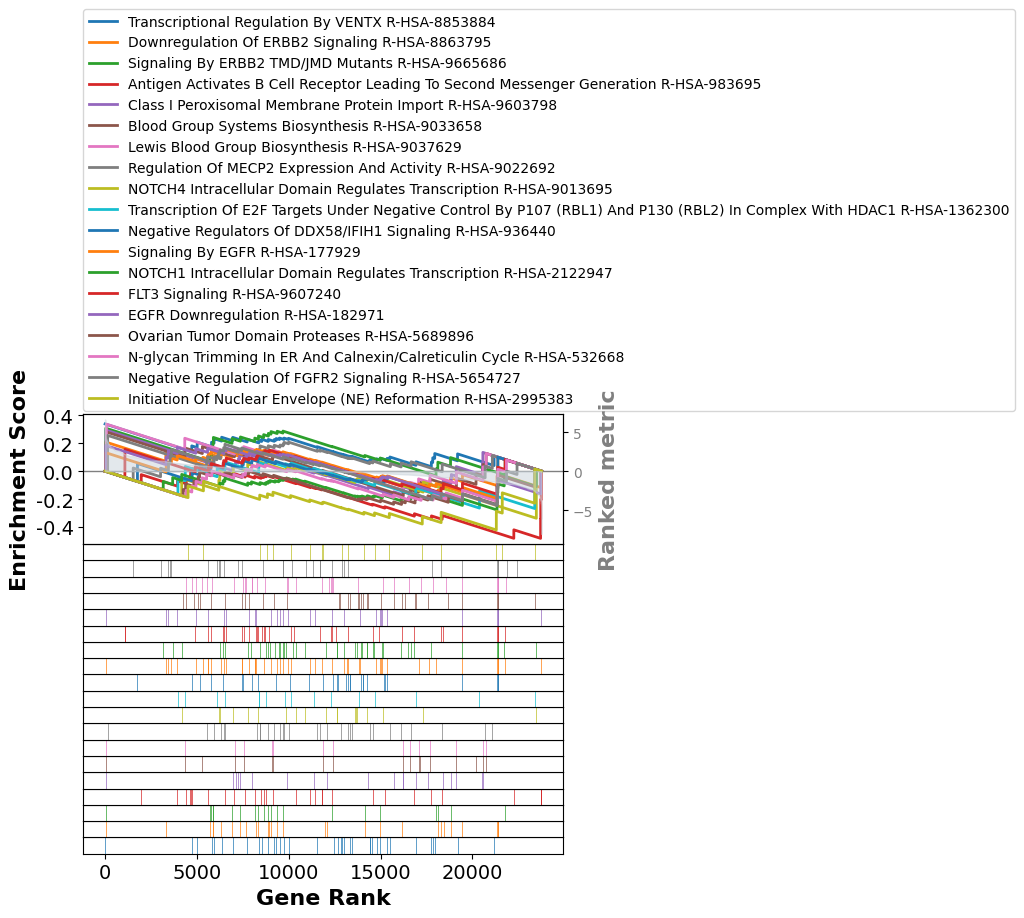

In [7]:
terms = res.res2d.sort_values(by = 'Gene %')
terms = terms.Term

axs = res.plot(terms=terms[1:20])
axs.tight_layout()
plt.savefig('../gene_set_enrichment/results/wt_vs_all/top 20 - wt vs all')
plt.show()

# Mdx vs all 

In [8]:
df = pd.read_csv('../differential_gene_expression/DE_results/DE_pydeseq2_cmc_logfc_0.5_Mdx_vs_all_20_11_24,13:19.tsv')
df

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Xkr4,22.351047,1.589582,1.167953,1.360998,0.173514,0.383003
1,Gm1992,2.148276,-0.455472,2.771750,-0.164327,0.869474,NaN
2,Gm19938,3.760212,2.335592,1.956239,1.193920,0.232509,NaN
3,Gm37381,10.087941,0.710396,1.142167,0.621972,0.533960,0.720981
4,Rp1,162.752680,-1.397657,0.602777,-2.318697,0.020411,0.096894
...,...,...,...,...,...,...,...
29373,Il11ra2-2,0.000000,NaN,NaN,NaN,NaN,NaN
29374,Ccl19-1,0.000000,NaN,NaN,NaN,NaN,NaN
29375,Ccl21a-1,0.000000,NaN,NaN,NaN,NaN,NaN
29376,Gm10931,0.493435,2.977389,5.245294,0.567630,0.570286,NaN


In [9]:
df.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
df

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Xkr4,22.351047,1.589582,1.167953,1.360998,0.173514,0.383003
1,Gm1992,2.148276,-0.455472,2.771750,-0.164327,0.869474,NaN
2,Gm19938,3.760212,2.335592,1.956239,1.193920,0.232509,NaN
3,Gm37381,10.087941,0.710396,1.142167,0.621972,0.533960,0.720981
4,Rp1,162.752680,-1.397657,0.602777,-2.318697,0.020411,0.096894
...,...,...,...,...,...,...,...
29373,Il11ra2-2,0.000000,NaN,NaN,NaN,NaN,NaN
29374,Ccl19-1,0.000000,NaN,NaN,NaN,NaN,NaN
29375,Ccl21a-1,0.000000,NaN,NaN,NaN,NaN,NaN
29376,Gm10931,0.493435,2.977389,5.245294,0.567630,0.570286,NaN


In [10]:
prerank_df = df[['Gene', 'log2FoldChange']]
prerank_df['Gene'] = prerank_df['Gene'].str.upper() 
prerank_df = prerank_df.sort_values(by='log2FoldChange', ascending=False)

prerank_df.to_csv('../gene_set_enrichment/results/mdx_vs_all/pre_ranked_list_mdx_vs_all.rnk', sep='\t', index=False, header=False)
prerank_df

/tmp/ipykernel_768051/2655849988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prerank_df['Gene'] = prerank_df['Gene'].str.upper()


,Gene,log2FoldChange
4804,CHIL3,11.228919
1314,FCGR3,10.689855
9780,C3AR1,10.381092
6462,C1QB,10.006115
18082,CCL7,9.852130
...,...,...
29372,CCL27A-2,NaN
29373,IL11RA2-2,NaN
29374,CCL19-1,NaN
29375,CCL21A-1,NaN


In [11]:
res = gp.prerank(rnk= prerank_df,gene_sets='Reactome_2022',outdir='../gene_set_enrichment/results/mdx_vs_all')
res.res2d.head()

2024-11-25 10:43:12,320 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-11-25 10:43:12,349 [WARNING] Duplicated values found in preranked stats: 17.90% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Peptide Chain Elongation R-HSA-156902,0.863179,2.273896,0.0,0.0,0.0,76/81,12.58%,EEF1A1;RPL13A;RPL36A;RPL11;RPS12;RPL27A;RPL23A...
1,prerank,Eukaryotic Translation Termination R-HSA-72764,0.856922,2.261108,0.0,0.0,0.0,75/85,11.63%,GSPT2;RPL13A;RPL36A;RPL11;RPS12;RPL27A;RPL23A;...
2,prerank,Viral mRNA Translation R-HSA-192823,0.854781,2.25334,0.0,0.0,0.0,73/85,11.63%,RPL13A;RPL36A;RPL11;RPS12;RPL27A;RPL23A;RPS3;R...
3,prerank,Eukaryotic Translation Elongation R-HSA-156842,0.85107,2.245737,0.0,0.0,0.0,77/85,12.58%,EEF1A1;RPL13A;RPL36A;RPL11;RPS12;RPL27A;RPL23A...
4,prerank,Nonsense Mediated Decay (NMD) Independent Of E...,0.84804,2.239118,0.0,0.0,0.0,74/87,11.63%,GSPT2;RPL13A;RPL36A;RPL11;RPS12;RPL27A;RPL23A;...


/tmp/ipykernel_768051/2023678527.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  axs.tight_layout()


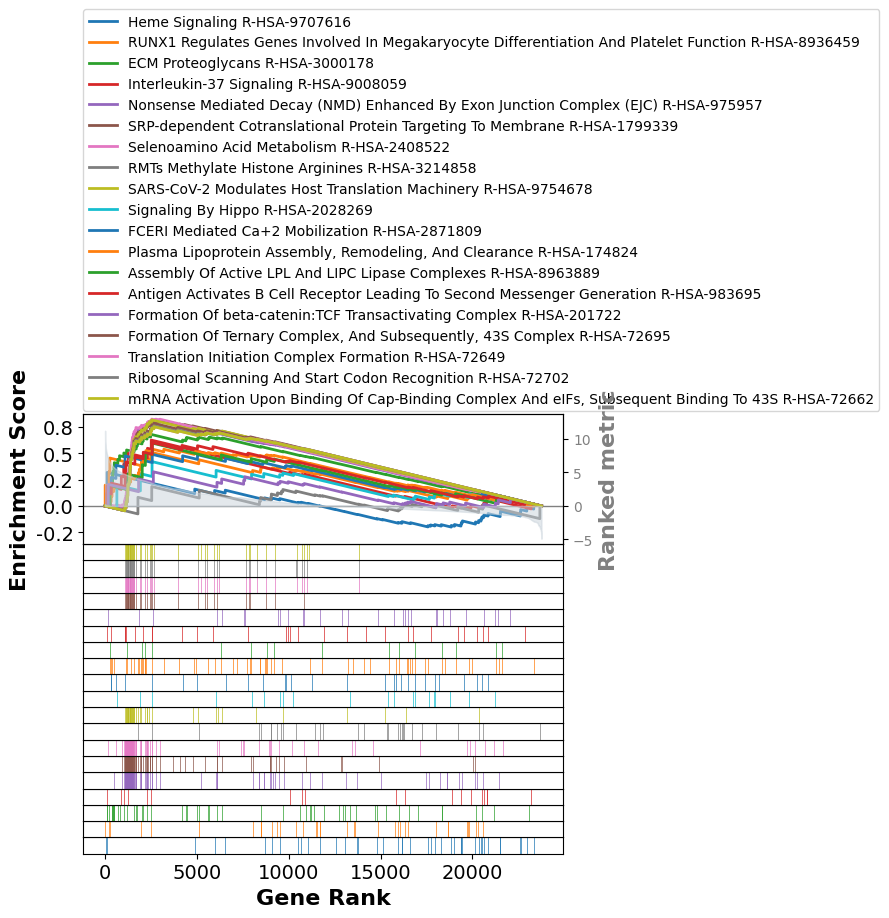

In [12]:
terms = res.res2d.sort_values(by = 'Gene %')
terms = terms.Term
axs = res.plot(terms=terms[1:20])
axs.tight_layout()
plt.savefig('../gene_set_enrichment/results/mdx_vs_all/top 20 - mdx vs all')
plt.show()

# MdxSCID vs all 

In [13]:
df = pd.read_csv('../differential_gene_expression/DE_results/DE_pydeseq2_cmc_logfc_0.5_Mdxscid_vs_all_20_11_24,13:19.tsv')
df

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Xkr4,22.351047,0.001815,1.142233,0.001589,0.998733,0.999534
1,Gm1992,2.148276,1.191615,2.750672,0.433209,0.664863,NaN
2,Gm19938,3.760212,-2.278380,1.967369,-1.158085,0.246829,NaN
3,Gm37381,10.087941,-1.719073,1.199453,-1.433213,0.151797,NaN
4,Rp1,162.752680,0.148761,0.609324,0.244142,0.807121,0.999161
...,...,...,...,...,...,...,...
29373,Il11ra2-2,0.000000,NaN,NaN,NaN,NaN,NaN
29374,Ccl19-1,0.000000,NaN,NaN,NaN,NaN,NaN
29375,Ccl21a-1,0.000000,NaN,NaN,NaN,NaN,NaN
29376,Gm10931,0.493435,-3.027099,5.301472,-0.570992,0.568005,NaN


In [14]:
df.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
df

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Xkr4,22.351047,0.001815,1.142233,0.001589,0.998733,0.999534
1,Gm1992,2.148276,1.191615,2.750672,0.433209,0.664863,NaN
2,Gm19938,3.760212,-2.278380,1.967369,-1.158085,0.246829,NaN
3,Gm37381,10.087941,-1.719073,1.199453,-1.433213,0.151797,NaN
4,Rp1,162.752680,0.148761,0.609324,0.244142,0.807121,0.999161
...,...,...,...,...,...,...,...
29373,Il11ra2-2,0.000000,NaN,NaN,NaN,NaN,NaN
29374,Ccl19-1,0.000000,NaN,NaN,NaN,NaN,NaN
29375,Ccl21a-1,0.000000,NaN,NaN,NaN,NaN,NaN
29376,Gm10931,0.493435,-3.027099,5.301472,-0.570992,0.568005,NaN


In [15]:
prerank_df = df[['Gene', 'log2FoldChange']]
prerank_df['Gene'] = prerank_df['Gene'].str.upper() 
prerank_df = prerank_df.sort_values(by='log2FoldChange', ascending=False)

prerank_df.to_csv('../gene_set_enrichment/results/mdxscid_vs_all/pre_ranked_list_mdxscid_vs_all.rnk', sep='\t', index=False, header=False)
prerank_df

/tmp/ipykernel_768051/322015048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prerank_df['Gene'] = prerank_df['Gene'].str.upper()


,Gene,log2FoldChange
19940,IGHA,8.025355
9272,IGKC,7.980618
23255,LY6D,7.725940
24092,IGLC1,7.131209
900,FCMR,6.555295
...,...,...
29372,CCL27A-2,NaN
29373,IL11RA2-2,NaN
29374,CCL19-1,NaN
29375,CCL21A-1,NaN


In [16]:
res = gp.prerank(rnk= prerank_df,gene_sets='Reactome_2022',outdir='../gene_set_enrichment/results/mdxscid_vs_all')
res.res2d.head()

2024-11-25 10:43:50,839 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-11-25 10:43:50,870 [WARNING] Duplicated values found in preranked stats: 17.90% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Translation R-HSA-72766,0.670822,3.061339,0.0,0.0,0.0,169/254,21.99%,MRPL21;GADD45GIP1;MRPL34;MRPS14;MRPS16;AURKAIP...
1,prerank,Respiratory Electron Transport R-HSA-611105,0.748884,2.970003,0.0,0.0,0.0,62/88,12.61%,NDUFAF3;UQCRB;NDUFAB1;CYCS;COX5A;COX6B1;NDUFB1...
2,prerank,Eukaryotic Translation Elongation R-HSA-156842,0.756616,2.96324,0.0,0.0,0.0,79/85,21.79%,RPL15;RPL36AL;RPS2;RPS13;RPL3L;RPL23A;RPL9;RPS...
3,prerank,Peptide Chain Elongation R-HSA-156902,0.754975,2.953473,0.0,0.0,0.0,75/81,21.79%,RPL15;RPL36AL;RPS2;RPS13;RPL3L;RPL23A;RPL9;RPS...
4,prerank,"Respiratory Electron Transport, ATP Synthesis ...",0.727245,2.940038,0.0,0.0,0.0,63/95,12.61%,NDUFAF3;UQCRB;NDUFAB1;CYCS;COX5A;COX6B1;NDUFB1...


/tmp/ipykernel_768051/236974862.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  axs.tight_layout()


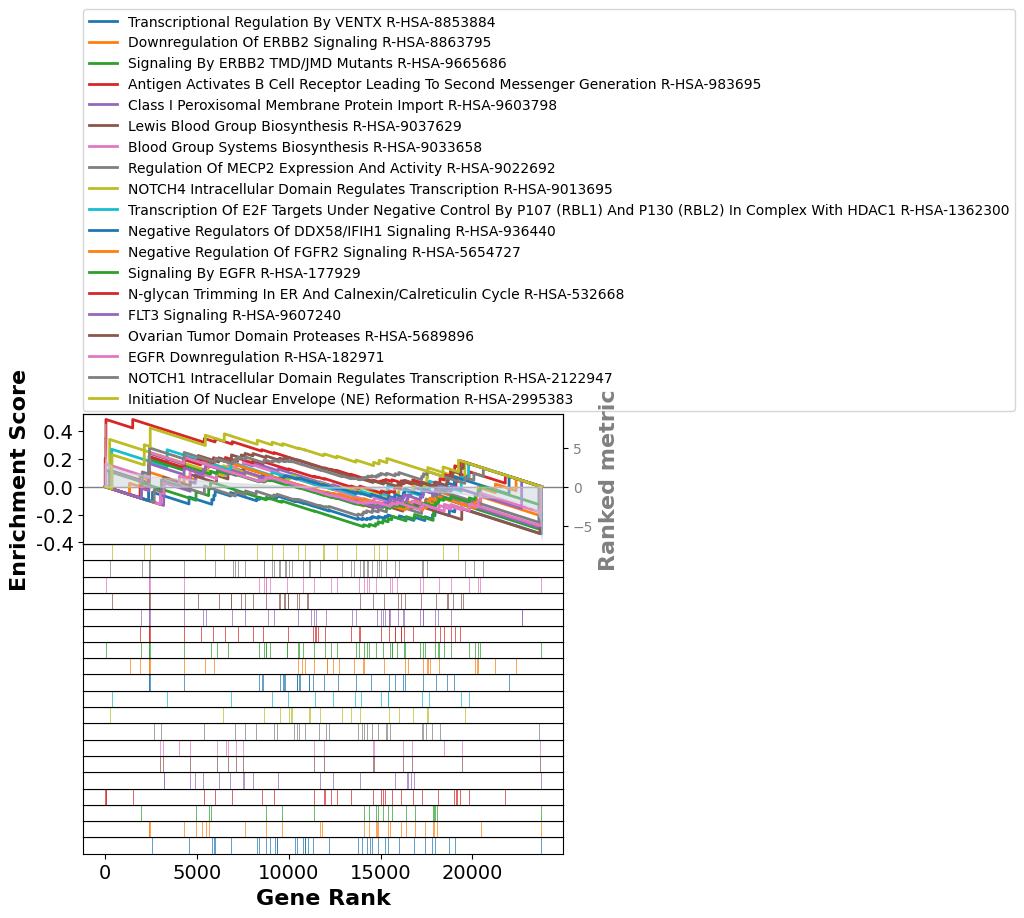

In [17]:
terms = res.res2d.sort_values(by = 'Gene %')
terms = terms.Term
axs = res.plot(terms=terms[1:20])
axs.tight_layout()
plt.savefig('../gene_set_enrichment/results/mdxscid_vs_all/top 20 - mdxscid vs all')
plt.show()